In [2]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as plt
from descartes import PolygonPatch
#from helpers import slug
#%load_ext signature
%matplotlib inline

description = ""


ImportError: dlopen(/anaconda3/envs/PythonData/lib/python3.6/site-packages/fiona/ogrext.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libkea.1.4.7.dylib
  Referenced from: /anaconda3/envs/PythonData/lib/libgdal.20.dylib
  Reason: image not found

In [ ]:
datafile = os.path.expanduser('femlitmap.csv')
shapefile = os.path.expanduser('Resources/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2016'
cols = ['Country Name','Country Code', year]
title = 'female lit ratio'.format(year)
#imgfile = 'img/{}.png'.format(slug(title))

In [2]:
fem_lit = pd.read_csv(datafile)


NameError: name 'pd' is not defined

In [3]:
femalelit_map = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
femalelit_map.sample(5)

NameError: name 'gpd' is not defined

In [7]:
femliteracy = pd.read_csv(datafile)
femliteracy.sample(5)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
163,163,Mozambique,MOZ,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,36.452278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,Dominica,DMA,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,145,St. Martin (French part),MAF,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,78,Gabon,GAB,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.878967,NaN,NaN,NaN,NaN,NaN
12,12,Austria,AUT,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged = femalelit_map.merge(femliteracy, left_on='ADM0_A3', right_on='Country Code')
merged.fillna(0)

ValueError: Null geometry supports no operations

ValueError: Null geometry supports no operations

/anaconda3/envs/PythonData/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


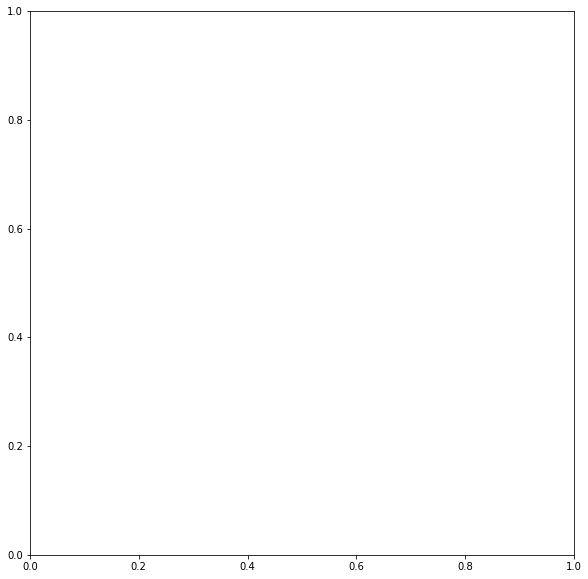

In [9]:
ax = merged.dropna().plot(column=merged['2008'], cmap=cmap, figsize=figsize, scheme='equal_interval', 
                          k=colors, legend=True)

#ax.get_legend().set_bbox_to_anchor((.12, .4))